
## Intro to Control Theory

* control theory
* matlab in python
* Ref: https://pypi.org/project/slycot/


In [26]:

## requires python 3.8

## conda install -c conda-forge slycot

## !pip install control


In [27]:


from control.matlab import *

import slycot



## Control System

Is usually described by a dynamic system

$ \large \frac{d}{dt} x = f(x, u, w_d)   $

$ y = g(x, u, w_n) $

The goal is to construct a control law, such as:

$  \large u = k(y, w_r) $

that minimizes a cost function:

$ \large J = J(x, u, w_r)  $ 

where $  w_d $ represents disturbances, $  w_n  $ represents a measurement of noise, 
and $  w_r $ represents a reference trajectory that can be tracked.




In [28]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]



## Cruise Control Example

Consider a simple model of cruise control for a car. Let $  u   $ be the rate of fuel fed into the engine and let $ y  $  be the car's speed

A very simple version without acceleration dynamics is as follows:

$ \large y = u  $

A closed loop control law, based on measurements of the speed, is able to compensate for unmodeled dynamics and disturbances.

Consider the closed loop control law:

$ \large u = K(w_r - y) $

so that gas is increased when the measured velocity is too low, and decreased when it is too high. 

For example, consider a tracking cruise control with reference speed of 60 mph. 

The model is 

$ \large y = u $

and the true system is

$ \large y = 0.5 u  $

Additionally, there is a disturbance in the form of rolling hills that increases and decreases the speed by 10 mph at a frequency of 0.5 Hz.

An open loop controller is compared with a closed loop proportional controller with K = 50. 




In [29]:

t = np.arange(0,10,0.01)   # time

t


array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
       1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.

In [30]:

wr = 60 * np.ones_like(t)  # reference speed

wr


array([60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
       60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
       60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
       60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
       60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
       60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
       60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
       60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
       60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
       60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
       60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
       60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
       60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
       60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60

In [31]:

len(wr)


1000

In [32]:

d = 10*np.sin(np.pi*t)     # disturbance from rolling hills


In [33]:

d


array([ 0.00000000e+00,  3.14107591e-01,  6.27905195e-01,  9.41083133e-01,
        1.25333234e+00,  1.56434465e+00,  1.87381315e+00,  2.18143241e+00,
        2.48689887e+00,  2.78991106e+00,  3.09016994e+00,  3.38737920e+00,
        3.68124553e+00,  3.97147891e+00,  4.25779292e+00,  4.53990500e+00,
        4.81753674e+00,  5.09041416e+00,  5.35826795e+00,  5.62083378e+00,
        5.87785252e+00,  6.12907054e+00,  6.37423990e+00,  6.61311865e+00,
        6.84547106e+00,  7.07106781e+00,  7.28968627e+00,  7.50111070e+00,
        7.70513243e+00,  7.90155012e+00,  8.09016994e+00,  8.27080574e+00,
        8.44327926e+00,  8.60742027e+00,  8.76306680e+00,  8.91006524e+00,
        9.04827052e+00,  9.17754626e+00,  9.29776486e+00,  9.40880769e+00,
        9.51056516e+00,  9.60293686e+00,  9.68583161e+00,  9.75916762e+00,
        9.82287251e+00,  9.87688341e+00,  9.92114701e+00,  9.95561965e+00,
        9.98026728e+00,  9.99506560e+00,  1.00000000e+01,  9.99506560e+00,
        9.98026728e+00,  

In [34]:

aModel = 1                 # y = aModel * u


In [35]:

aTrue = 0.5                # y = aTrue * u


In [36]:

uOL = wr / aModel            # Open-loop u based on model

uOL


array([60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
       60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
       60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
       60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
       60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
       60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
       60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
       60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
       60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
       60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
       60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
       60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
       60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
       60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60

In [37]:

yOL = aTrue * uOL + d        # Open-loop response

yOL 


array([30.        , 30.31410759, 30.6279052 , 30.94108313, 31.25333234,
       31.56434465, 31.87381315, 32.18143241, 32.48689887, 32.78991106,
       33.09016994, 33.3873792 , 33.68124553, 33.97147891, 34.25779292,
       34.539905  , 34.81753674, 35.09041416, 35.35826795, 35.62083378,
       35.87785252, 36.12907054, 36.3742399 , 36.61311865, 36.84547106,
       37.07106781, 37.28968627, 37.5011107 , 37.70513243, 37.90155012,
       38.09016994, 38.27080574, 38.44327926, 38.60742027, 38.7630668 ,
       38.91006524, 39.04827052, 39.17754626, 39.29776486, 39.40880769,
       39.51056516, 39.60293686, 39.68583161, 39.75916762, 39.82287251,
       39.87688341, 39.92114701, 39.95561965, 39.98026728, 39.9950656 ,
       40.        , 39.9950656 , 39.98026728, 39.95561965, 39.92114701,
       39.87688341, 39.82287251, 39.75916762, 39.68583161, 39.60293686,
       39.51056516, 39.40880769, 39.29776486, 39.17754626, 39.04827052,
       38.91006524, 38.7630668 , 38.60742027, 38.44327926, 38.27

In [38]:

K = 50                     # control gain, u = K( wr-y )


In [39]:

yCL = ( aTrue * K / (1 + aTrue * K)) * wr + d / (1 + aTrue * K)


In [40]:

yCL


array([57.69230769, 57.70438875, 57.71645789, 57.7285032 , 57.74051278,
       57.75247479, 57.76437743, 57.77620894, 57.78795765, 57.79961196,
       57.81116038, 57.82259151, 57.83389406, 57.84505688, 57.85606896,
       57.86691942, 57.87759757, 57.88809285, 57.89839492, 57.90849361,
       57.91837894, 57.92804117, 57.93747077, 57.94665841, 57.95559504,
       57.96427184, 57.97268024, 57.98081195, 57.98865894, 57.99621347,
       58.00346807, 58.01041561, 58.0170492 , 58.02336232, 58.02934872,
       58.03500251, 58.0403181 , 58.04529024, 58.04991403, 58.05418491,
       58.05809866, 58.06165142, 58.06483968, 58.06766029, 58.07011048,
       58.07218782, 58.07389027, 58.07521614, 58.07616413, 58.07673329,
       58.07692308, 58.07673329, 58.07616413, 58.07521614, 58.07389027,
       58.07218782, 58.07011048, 58.06766029, 58.06483968, 58.06165142,
       58.05809866, 58.05418491, 58.04991403, 58.04529024, 58.0403181 ,
       58.03500251, 58.02934872, 58.02336232, 58.0170492 , 58.01

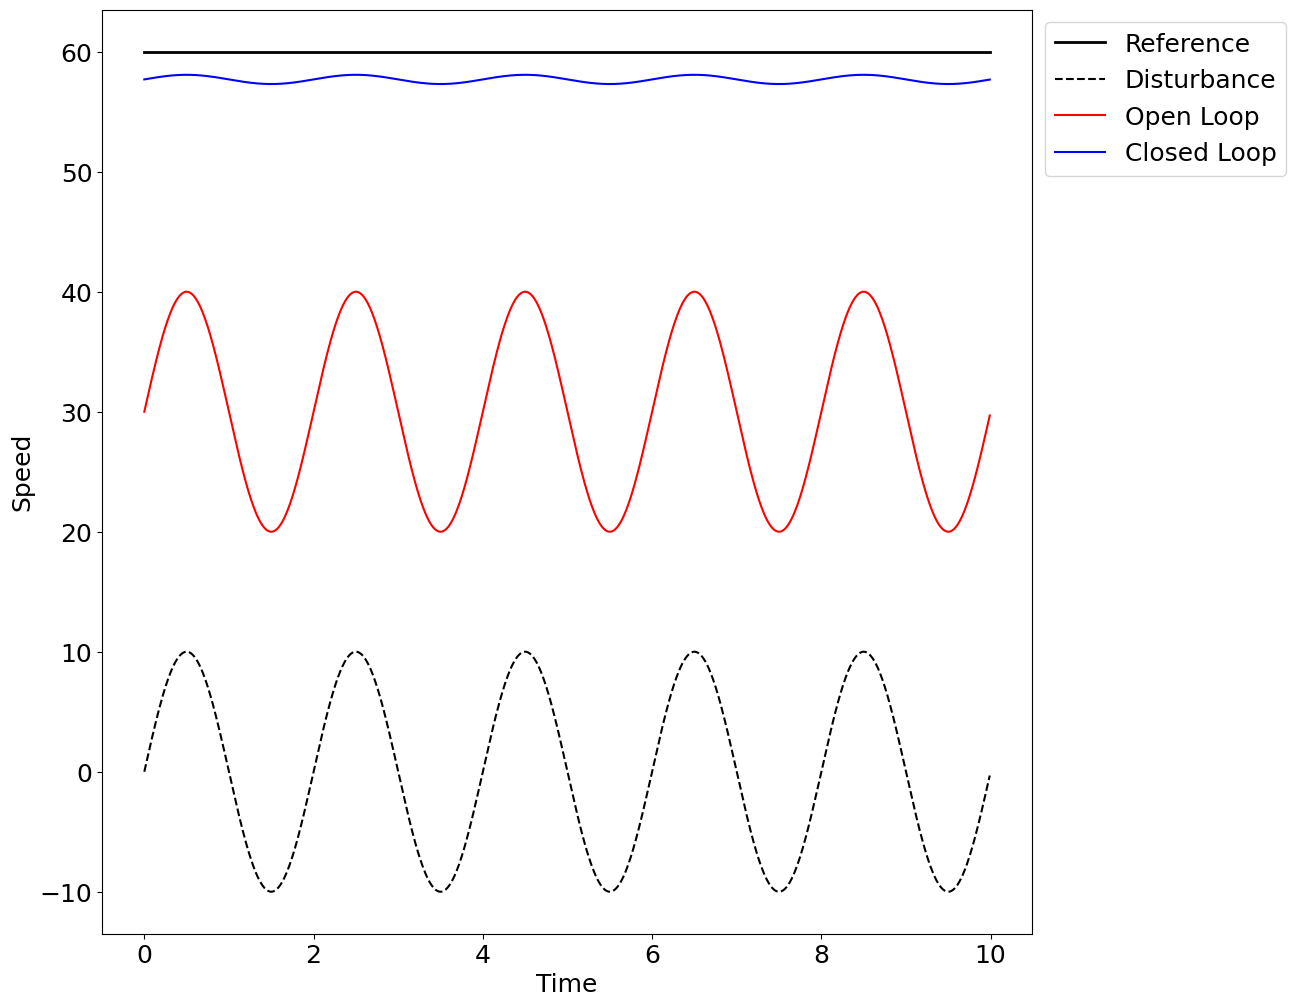

In [41]:

plt.plot(t, wr,  'k',   linewidth=2,    label='Reference'    )
plt.plot(t, d,   'k--', linewidth=1.5,  label='Disturbance'  )
plt.plot(t, yOL, 'r',   linewidth=1.5,  label='Open Loop'    )
plt.plot(t, yCL, 'b',   linewidth=1.5,  label='Closed Loop'  )

plt.xlabel('Time'   )
plt.ylabel('Speed'  )

plt.legend(loc="upper left", bbox_to_anchor=(1,1) )
plt.show()
